In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
def imagestoDF(direc):
   
    pathN=Path(str(direc)+"/NORMAL/")
    print("Inicia el preprocesamiento imagenes Normales")
    imagesN = imagesPreproces(pathN)
    imagenes_matN = np.array(imagesN)
    pathP=Path(str(direc)+"/PNEUMONIA/")
    print("Inicia el preprocesamiento imagenes Pneumonia")
    imagesP = imagesPreproces(pathP)
    imagenes_matP = np.array(imagesP)
    normales = np.zeros((imagenes_matN.shape[0], 1), int)
    pneumonia = np.ones((imagenes_matP.shape[0], 1), int)
    imagenes_mat = np.concatenate((imagenes_matN,imagenes_matP),axis=0)
    imagenes_mat1 = np.reshape(imagenes_mat, (imagenes_mat.shape[0], -1))
    df = pd.DataFrame(data=imagenes_mat1)
    tg = np.concatenate((normales,pneumonia),axis=0)
    df['target'] = tg
    return df
    

In [3]:
def imagesPreproces(direc):
 
    pathimgs=direc.glob("*.jpeg")
    images=[]
    for imagepath in pathimgs:
        img = io.imread(str(imagepath))
        img_g = rgb2gray(img)
        image_resized = resize(img_g, (256, 256), anti_aliasing=False)
        images.append(image_resized)
    
    print("Imagenes preprocesadas de {}".format(str(direc)))
    print("Imagenes preprocesadas: {}".format(len(images)))
    return images

In [4]:
path=Path(r"C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\train")

dfTrain = imagestoDF(path)

dfTrain.head()

Inicia el preprocesamiento imagenes Normales


C:\Users\Oney\AppData\Local\Temp/ipykernel_28620/1357911908.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_g = rgb2gray(img)


Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\train\NORMAL
Imagenes preprocesadas: 999
Inicia el preprocesamiento imagenes Pneumonia
Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\train\PNEUMONIA
Imagenes preprocesadas: 999


,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,target
0,0.090702,0.070588,0.071293,0.077963,0.062360,0.061673,0.139711,0.216192,0.224035,0.250780,...,0.428485,0.427878,0.443336,0.435152,0.435141,0.440610,0.444486,0.454305,0.442966,0
1,0.054902,0.094095,0.093673,0.120129,0.124510,0.133184,0.147626,0.144864,0.168068,0.187255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.067907,0.084663,0.108287,0.125490,0.137240,0.169945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002453,0.011806,0
3,0.155533,0.176318,0.180402,0.191628,0.215234,0.220634,0.232016,0.245918,0.262328,0.295910,...,0.040081,0.043528,0.041498,0.041085,0.047051,0.044623,0.043135,0.051049,0.043137,0
4,0.301786,0.291721,0.252267,0.236117,0.206081,0.179016,0.136014,0.109584,0.109480,0.098948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [5]:
X_train = dfTrain.drop(columns=['target'])
y_train = dfTrain['target']

In [6]:
path=Path(r"C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\test")
dfTest = imagestoDF(path)
dfTest.head()

Inicia el preprocesamiento imagenes Normales


C:\Users\Oney\AppData\Local\Temp/ipykernel_28620/1357911908.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_g = rgb2gray(img)


Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\test\NORMAL
Imagenes preprocesadas: 234
Inicia el preprocesamiento imagenes Pneumonia
Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\test\PNEUMONIA
Imagenes preprocesadas: 390


,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,target
0,0.122350,0.122135,0.124161,0.129160,0.128326,0.113085,0.116935,0.120937,0.113964,0.117480,...,0.126677,0.129036,0.127949,0.127969,0.128650,0.136098,0.124820,0.132123,0.133086,0
1,0.100176,0.149150,0.120181,0.104498,0.112875,0.082035,0.220389,0.295424,0.319554,0.355115,...,0.127650,0.130018,0.127442,0.128933,0.131640,0.123989,0.131579,0.122212,0.120090,0
2,0.157989,0.147894,0.146178,0.150321,0.150223,0.134390,0.115128,0.131963,0.125490,0.147993,...,0.107652,0.129771,0.133065,0.137025,0.145373,0.135156,0.145711,0.130538,0.134643,0
3,0.281163,0.278431,0.293973,0.286627,0.301100,0.298583,0.301608,0.306509,0.356510,0.355610,...,0.466745,0.416318,0.513215,0.509130,0.507869,0.542520,0.553454,0.477036,0.508847,0
4,0.164936,0.162251,0.152941,0.154885,0.154557,0.139438,0.152941,0.154257,0.141176,0.138625,...,0.160394,0.152390,0.163317,0.168827,0.173437,0.179372,0.174029,0.181641,0.179896,0


In [7]:
X_test = dfTest.drop(columns=['target'])
y_test = dfTest['target']

In [8]:
path=Path(r"C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\val")
dfVal = imagestoDF(path)
dfVal.head()

Inicia el preprocesamiento imagenes Normales


C:\Users\Oney\AppData\Local\Temp/ipykernel_28620/1357911908.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_g = rgb2gray(img)


Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\val\NORMAL
Imagenes preprocesadas: 8
Inicia el preprocesamiento imagenes Pneumonia
Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\val\PNEUMONIA
Imagenes preprocesadas: 8


,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,target
0,0.726051,0.013285,0.043643,0.067122,0.094056,0.112377,0.137990,0.164641,0.201532,0.223876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.634475,0.014407,0.442019,0.451103,0.296856,0.283257,0.241305,0.147913,0.029843,0.011091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.683387,0.007811,0.290590,0.324872,0.380008,0.367714,0.400644,0.415680,0.422222,0.196676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.341785,0.013840,0.687672,0.340832,0.236037,0.195711,0.136477,0.114560,0.111926,0.126697,...,0.000000,0.052466,0.005668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.078092,0.009182,0.213637,0.073344,0.061684,0.066667,0.054963,0.056018,0.112058,0.147120,...,0.132108,0.183490,0.145035,0.191738,0.139338,0.123033,0.125172,0.108065,0.106706,0


In [9]:
X_val = dfVal.drop(columns=['target'])
y_val = dfVal['target']

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [11]:
clf = KNeighborsClassifier(n_neighbors=2)

In [12]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [13]:
print(clf.score(X_train,y_train))

0.974974974974975


In [14]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
categorias = ['Normal','Neumonia']
df_cm = pd.DataFrame(cm,index=categorias,columns=categorias)
df_cm.head()

,Normal,Neumonia
Normal,159,75
Neumonia,33,357


<AxesSubplot:>

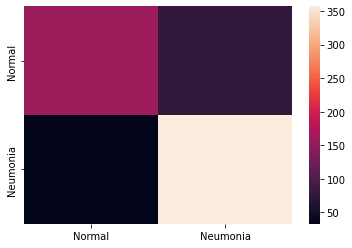

In [15]:
sns.heatmap(df_cm, annot=False)

In [16]:
acc_test = accuracy_score(y_test,pred)*100
print("Precisión: {0:.2f}%".format(acc_test))

Precisión: 82.69%


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       234
           1       0.83      0.92      0.87       390

    accuracy                           0.83       624
   macro avg       0.83      0.80      0.81       624
weighted avg       0.83      0.83      0.82       624



In [18]:
val= clf.predict(X_val)
cm_val = confusion_matrix(y_val, val)
df_cm_val = pd.DataFrame(cm_val,index=categorias,columns=categorias)
df_cm_val.head()

,Normal,Neumonia
Normal,5,3
Neumonia,1,7


<AxesSubplot:>

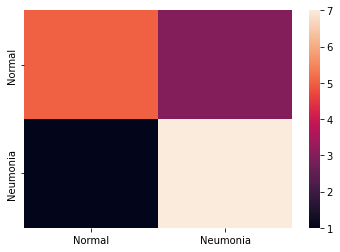

In [19]:
sns.heatmap(df_cm_val, annot=False)

In [20]:
acc_val = accuracy_score(y_val,val)*100
print("Precisión Validación: {0:.2f}%".format(acc_val))

Precisión Validación: 75.00%


In [21]:
print(classification_report(y_val,val))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.70      0.88      0.78         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



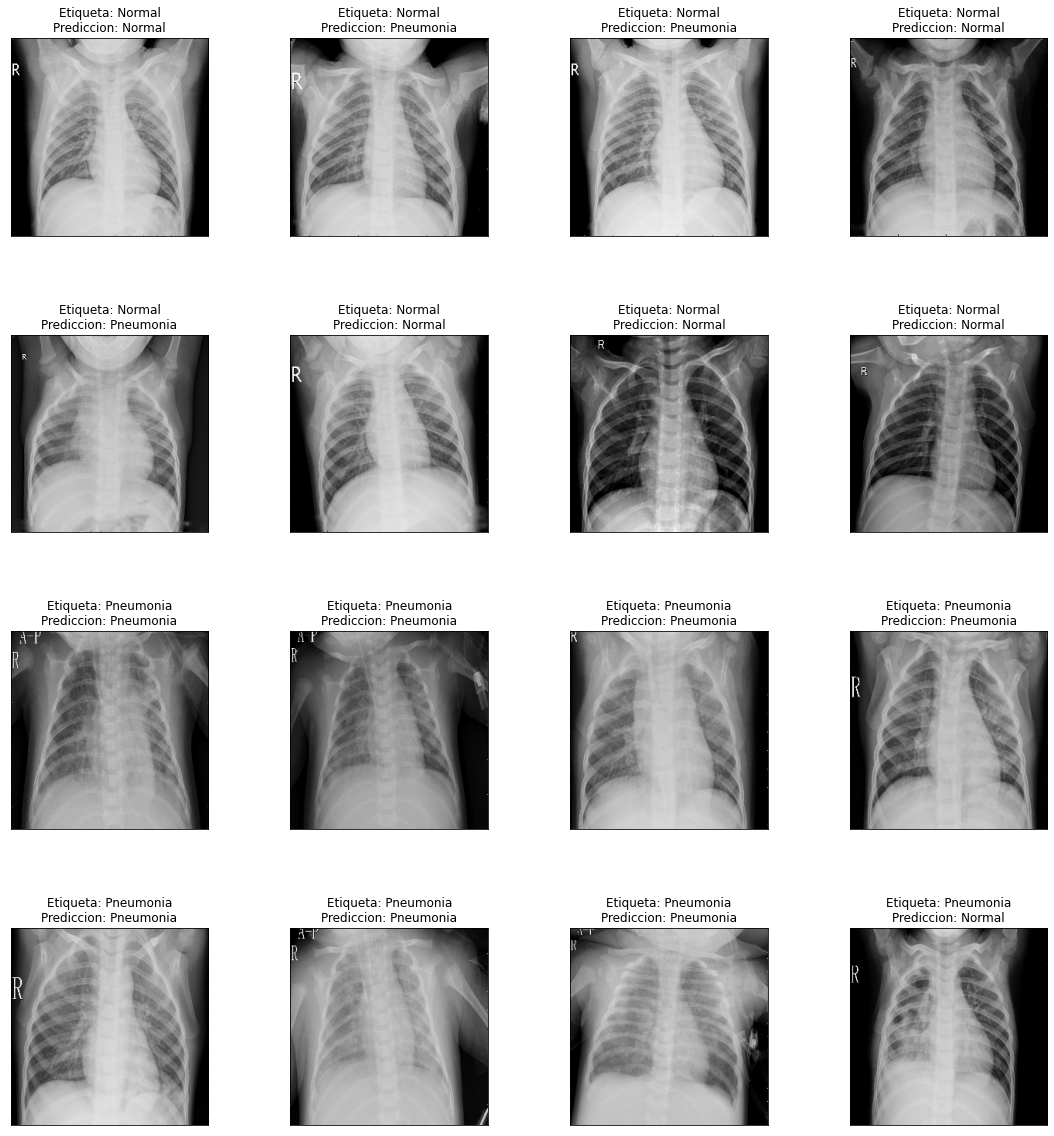

In [22]:
fig, axes = plt.subplots(4,4,figsize=(20,20),
                        subplot_kw = {'xticks': [],'yticks':[]},
                        gridspec_kw = dict(hspace = 0.5,wspace = 0.01))
for i,ax in enumerate(axes.flat):
    imagenp = np.array(X_val.iloc[i].values)
    imagenp = np.reshape(imagenp,(256,256))
    ax.imshow(imagenp, cmap=plt.cm.gray)
    tipo = y_val.iloc[i]
    if(tipo == 0):
        tipostr="Normal"
    else:
        tipostr="Pneumonia"
    
    if(val[i] == 0):
        predstr="Normal"
    else:
        predstr="Pneumonia"
    ax.set_title("Etiqueta: {}\nPrediccion: {}".format(tipostr,predstr))
    